# Investigate a dataset : Titanic

## Contents of the dataset

In [1]:
import pandas as pd

df = pd.read_csv('titanic_data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Our tasks:

 What factors made people more likely to survive?

## First Stage: Data Wrangling (Data Cleaning)

 Before we start our analysis we should first remove the unnecessary data (columns) which are not useful. e.g., 'Ticket', 'Cabin', 'Embarked'. These following data's are not required since the survival of the passenger does not depend on these.

In [2]:
df = df.drop(['Ticket', 'Cabin', 'Embarked'], axis = 1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500


We check how many null values in every columns.

In [3]:
count_nan = len(df) - df.count()
count_nan

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

From the above result, we found that only 'Age' column has null values. So, we remove the rows which have null values.

In [4]:
df_nan = df.dropna()

## Second Stage: Data Exploration

Analyse the data to find patterns which helps to solve our problems

### Total people in the dataset

In [5]:
def length(pclass, sex):
    return len(df[(df['Sex'] == sex) & (df['Pclass'] == pclass)])

male_upper = length(1,'male')
male_middle = length(2,'male')
male_lower = length(3,'male')
female_upper = length(1,'female')
female_middle = length(2,'female')
female_lower = length(3,'female')
total_sum = male_upper + male_middle + male_lower + female_upper + female_middle + female_lower 

total_people = pd.DataFrame(
        data = [[male_upper, female_upper, male_upper+female_upper],
                [male_middle, female_middle, male_middle+female_middle],
                [male_lower, female_lower, male_lower+female_lower],
                [male_lower+male_middle+male_upper, female_upper+female_middle+female_lower, total_sum]],
        index = ['Upper Class', 'Middle Class', 'Lower Class', 'Total'],
        columns = ['Male', 'Female', 'Total']
)

total_people

,Male,Female,Total
Upper Class,122,94,216
Middle Class,108,76,184
Lower Class,347,144,491
Total,577,314,891


We have found that total 577 male and 314 female. Out of 577 male, 122 belongs to Upper Class, 108 belongs to Middle Class and 347 belongs to Lower Class. Out of 314 female, 94 belongs to Upper Class, 76 belongs to Middle Class and 144 belongs to Lower Class. There are total 891 people in the dataset.

### Total people survived in the dataset

In [6]:
def length_survived(pclass, sex):
    return len(df[(df['Pclass'] == pclass) & (df['Sex'] == sex) & (df['Survived'] == 1)])

male_survived_upper = length_survived(1,'male')
male_survived_middle = length_survived(2,'male')
male_survived_lower = length_survived(3,'male')
female_survived_upper = length_survived(1,'female')
female_survived_middle = length_survived(2,'female')
female_survived_lower = length_survived(3,'female')
total_survived_sum = male_survived_upper + male_survived_middle + male_survived_lower\
                    + female_survived_upper + female_survived_middle + female_survived_lower 

total_people_survived = pd.DataFrame(
        data = [[male_survived_upper, female_survived_upper, male_survived_upper+female_survived_upper],
                [male_survived_middle, female_survived_middle, male_survived_middle+female_survived_middle],
                [male_survived_lower, female_survived_lower, male_survived_lower+female_survived_lower],
                [male_survived_lower+male_survived_middle+male_survived_upper, 
                 female_survived_upper+female_survived_middle+female_survived_lower, total_survived_sum]],
        index = ['Upper Class', 'Middle Class', 'Lower Class', 'Total'],
        columns = ['Male', 'Female', 'Total']
)

total_people_survived

,Male,Female,Total
Upper Class,45,91,136
Middle Class,17,70,87
Lower Class,47,72,119
Total,109,233,342


We have found that total 109 male and 233 female survived. Out of 109 male survived, 45 belongs to Upper Class, 17 belongs to Middle Class and 47 belongs to Lower Class. Out of 314 female survived, 91 belongs to Upper Class, 70 belongs to Middle Class and 72 belongs to Lower Class. There are total 342 people survived in the dataset.

### Count unique lastname

In [7]:
lastname = df['Name'].str.split(',').str.get(0)
lastname_df = pd.DataFrame(
        data = [lastname]
)

lastname_rows = lastname_df.transpose()
lastname_count = lastname_rows.apply(pd.value_counts)
lastname_count.head()

,Name
Andersson,9
Sage,7
Carter,6
Goodwin,6
Skoog,6


We count unique lastname so that we can get data about how many people belong to particular lastname or also how many people belong to one family. But, we can't draw conclusion because maybe two family have same lastname. So, we can't say that frequency of the particular lastname equal to number of members in that family.

### Available age data of people in the dataset

In [8]:
print 'Total number of people : ' + str(len(df))
print 'Number of people whose age data is available : ' +\
        str(len(df[pd.notnull(df['Age'])]))
print 'Number of people whose age data is missing : ' +\
        str(len(df[pd.isnull(df['Age'])]))

Total number of people : 891
Number of people whose age data is available : 714
Number of people whose age data is missing : 177


### Mean age of the people 

In [9]:
def age(pclass, sex):
    return df[(df['Sex'] == sex) & (df['Pclass'] == pclass) & (pd.notnull(df['Age']))]['Age']

male_age_upper = age(1,'male').mean()
male_age_middle = age(2,'male').mean()
male_age_lower = age(3,'male').mean()
female_age_upper = age(1,'female').mean()
female_age_middle = age(2,'female').mean()
female_age_lower = age(3,'female').mean()

total_age_upper = df[(df['Pclass'] == 1) & (pd.notnull(df['Age']))]['Age'].mean()
total_age_middle = df[(df['Pclass'] == 2) & (pd.notnull(df['Age']))]['Age'].mean()
total_age_lower = df[(df['Pclass'] == 3) & (pd.notnull(df['Age']))]['Age'].mean()
male_age_total = df[(df['Sex'] == 'male') & (pd.notnull(df['Age']))]['Age'].mean()
female_age_total = df[(df['Sex'] == 'female') & (pd.notnull(df['Age']))]['Age'].mean()
total_age = df[(pd.notnull(df['Age']))]['Age'].mean()

people_mean_age = pd.DataFrame(
        data = [[male_age_upper, female_age_upper, total_age_upper],
                [male_age_middle, female_age_middle, total_age_middle],
                [male_age_lower, female_age_lower, total_age_lower],
                [male_age_total, female_age_total, total_age]],
        index = ['Upper Class', 'Middle Class', 'Lower Class', 'Total'],
        columns = ['Male', 'Female', 'Total']
)

people_mean_age

,Male,Female,Total
Upper Class,41.281386,34.611765,38.233441
Middle Class,30.740707,28.722973,29.877630
Lower Class,26.507589,21.750000,25.140620
Total,30.726645,27.915709,29.699118


Mean age of the male passenger is 30.72  and the female passenger is 27.91. Mean age of the all passenger in the dataset is 29.7.

### Median age of the people 

In [10]:
def age(pclass, sex):
    return df[(df['Sex'] == sex) & (df['Pclass'] == pclass) & (pd.notnull(df['Age']))]['Age']

male_age_upper = age(1,'male').median()
male_age_middle = age(2,'male').median()
male_age_lower = age(3,'male').median()
female_age_upper = age(1,'female').median()
female_age_middle = age(2,'female').median()
female_age_lower = age(3,'female').median()

total_age_upper = df[(df['Pclass'] == 1) & (pd.notnull(df['Age']))]['Age'].median()
total_age_middle = df[(df['Pclass'] == 2) & (pd.notnull(df['Age']))]['Age'].median()
total_age_lower = df[(df['Pclass'] == 3) & (pd.notnull(df['Age']))]['Age'].median()
male_age_total = df[(df['Sex'] == 'male') & (pd.notnull(df['Age']))]['Age'].median()
female_age_total = df[(df['Sex'] == 'female') & (pd.notnull(df['Age']))]['Age'].median()
total_age = df[(pd.notnull(df['Age']))]['Age'].median()

people_median_age = pd.DataFrame(
        data = [[male_age_upper, female_age_upper, total_age_upper],
                [male_age_middle, female_age_middle, total_age_middle],
                [male_age_lower, female_age_lower, total_age_lower],
                [male_age_total, female_age_total, total_age]],
        index = ['Upper Class', 'Middle Class', 'Lower Class', 'Total'],
        columns = ['Male', 'Female', 'Total']
)

people_median_age

,Male,Female,Total
Upper Class,40.0,35.0,37.0
Middle Class,30.0,28.0,29.0
Lower Class,25.0,21.5,24.0
Total,29.0,27.0,28.0


Median age of the male passenger is 29 and the female passenger is 27. Median age of all the passenger in the dataset is 28.

### Mean age of the survived people

In [11]:
def age_survived(pclass, sex):
    return df[(df['Sex'] == sex) & (df['Pclass'] == pclass) & (df['Survived'] == 1) & (pd.notnull(df['Age']))]['Age']

male_survived_age_upper = age_survived(1,'male').mean()
male_survived_age_middle = age_survived(2,'male').mean()
male_survived_age_lower = age_survived(3,'male').mean()
female_survived_age_upper = age_survived(1,'female').mean()
female_survived_age_middle = age_survived(2,'female').mean()
female_survived_age_lower = age_survived(3,'female').mean()

total_survived_age_upper = df[(df['Pclass'] == 1) & (df['Survived'] == 1) & (pd.notnull(df['Age']))]['Age'].mean()
total_survived_age_middle = df[(df['Pclass'] == 2) & (df['Survived'] == 1) & (pd.notnull(df['Age']))]['Age'].mean()
total_survived_age_lower = df[(df['Pclass'] == 3) & (df['Survived'] == 1) & (pd.notnull(df['Age']))]['Age'].mean()
male_survived_age_total = df[(df['Sex'] == 'male') & (df['Survived'] == 1) & (pd.notnull(df['Age']))]['Age'].mean()
female_survived_age_total = df[(df['Sex'] == 'female') & (df['Survived'] == 1) & (pd.notnull(df['Age']))]['Age'].mean()
total_survived_age = df[(df['Survived'] == 1) & (pd.notnull(df['Age']))]['Age'].mean()

people_survived_mean_age = pd.DataFrame(
        data = [[male_survived_age_upper, female_survived_age_upper, total_survived_age_upper],
                [male_survived_age_middle, female_survived_age_middle, total_survived_age_middle],
                [male_survived_age_lower, female_survived_age_lower, total_survived_age_lower],
                [male_survived_age_total, female_survived_age_total, total_survived_age]],
        index = ['Upper Class', 'Middle Class', 'Lower Class', 'Total'],
        columns = ['Male', 'Female', 'Total']
)

people_survived_mean_age

,Male,Female,Total
Upper Class,36.248000,34.939024,35.368197
Middle Class,16.022000,28.080882,25.901566
Lower Class,22.274211,19.329787,20.646118
Total,27.276022,28.847716,28.343690


Mean age of the survived male passenger is 30.72  and the female passenger is 27.91. Mean age of the all survived passenger in the dataset is 29.7.

### Meadian age of the survived people

In [12]:
def age_survived(pclass, sex):
    return df[(df['Sex'] == sex) & (df['Pclass'] == pclass) & (df['Survived'] == 1) & (pd.notnull(df['Age']))]['Age']

male_survived_age_upper = age_survived(1,'male').median()
male_survived_age_middle = age_survived(2,'male').median()
male_survived_age_lower = age_survived(3,'male').median()
female_survived_age_upper = age_survived(1,'female').median()
female_survived_age_middle = age_survived(2,'female').median()
female_survived_age_lower = age_survived(3,'female').median()

total_survived_age_upper = df[(df['Pclass'] == 1) & (df['Survived'] == 1) & (pd.notnull(df['Age']))]['Age'].median()
total_survived_age_middle = df[(df['Pclass'] == 2) & (df['Survived'] == 1) & (pd.notnull(df['Age']))]['Age'].median()
total_survived_age_lower = df[(df['Pclass'] == 3) & (df['Survived'] == 1) & (pd.notnull(df['Age']))]['Age'].median()
male_survived_age_total = df[(df['Sex'] == 'male') & (df['Survived'] == 1) & (pd.notnull(df['Age']))]['Age'].median()
female_survived_age_total = df[(df['Sex'] == 'female') & (df['Survived'] == 1) & (pd.notnull(df['Age']))]['Age'].median()
total_survived_age = df[(df['Survived'] == 1) & (pd.notnull(df['Age']))]['Age'].median()

people_survived_mean_age = pd.DataFrame(
        data = [[male_survived_age_upper, female_survived_age_upper, total_survived_age_upper],
                [male_survived_age_middle, female_survived_age_middle, total_survived_age_middle],
                [male_survived_age_lower, female_survived_age_lower, total_survived_age_lower],
                [male_survived_age_total, female_survived_age_total, total_survived_age]],
        index = ['Upper Class', 'Middle Class', 'Lower Class', 'Total'],
        columns = ['Male', 'Female', 'Total']
)

people_survived_mean_age

,Male,Female,Total
Upper Class,36.0,35.0,35.0
Middle Class,3.0,28.0,28.0
Lower Class,25.0,19.0,22.0
Total,28.0,28.0,28.0


Median age of the survived male passenger is 30.72  and the female passenger is 27.91. Median age of the all survived passenger in the dataset is 29.7.

### Mean fair of survived and not survived people

In [13]:
mean_survived_fare = df[(df['Survived'] == 1)]['Fare'].mean()
mean_unsurvived_fare = df[(df['Survived'] == 0)]['Fare'].mean()
mean_total_fare = df['Fare'].mean()

mean_fare = pd.DataFrame(
        data = [[mean_survived_fare, mean_unsurvived_fare, mean_total_fare]],
        index = ['Fare'],
        columns = ['Survived', 'Not Survived', 'Total']
)

mean_fare

,Survived,Not Survived,Total
Fare,48.395408,22.117887,32.204208


Survived people fare are significantly higher than unsurvived people.

### Standard deviation in the fare of survived and not survived people

In [14]:
std_survived_fare = df[(df['Survived'] == 1)]['Fare'].std()
std_unsurvived_fare = df[(df['Survived'] == 0)]['Fare'].std()
std_total_fare = df['Fare'].mean()

std_fare = pd.DataFrame(
        data = [[std_survived_fare, std_unsurvived_fare, std_total_fare]],
        index = ['Fare'],
        columns = ['Survived', 'Not Survived', 'Total']
)

mean_fare

,Survived,Not Survived,Total
Fare,48.395408,22.117887,32.204208


Standard deviation are higher for both cases but std of survived are significantly higher than unsurvived people. 

### Min and max fare

In [15]:
min_fare_survived = df[(df['Survived'] == 1)]['Fare'].min()
min_fare_unsurvived = df[(df['Survived'] == 0)]['Fare'].min()
min_fare_total = df['Fare'].min()
max_fare_survived = df[(df['Survived'] == 1)]['Fare'].max()
max_fare_unsurvived = df[(df['Survived'] == 0)]['Fare'].max()
max_fare_total = df['Fare'].max()

min_max_fare = pd.DataFrame(
        data = [[min_fare_survived, min_fare_unsurvived, min_fare_total],
                [max_fare_survived, max_fare_unsurvived, max_fare_total]],
        index = ['Min Fare', 'Max Fare'],
        columns = ['Survived', 'Not Survived', 'Total']
)

min_max_fare

,Survived,Not Survived,Total
Min Fare,0.0000,0.0,0.0000
Max Fare,512.3292,263.0,512.3292


Above conclusion draw some interesting conclusion that min fare of both survived and unsurvived people are equal to 0. But, max fare are significantly high.

## Third Stage: Data Visualization

### Passenger ages

/home/pk/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


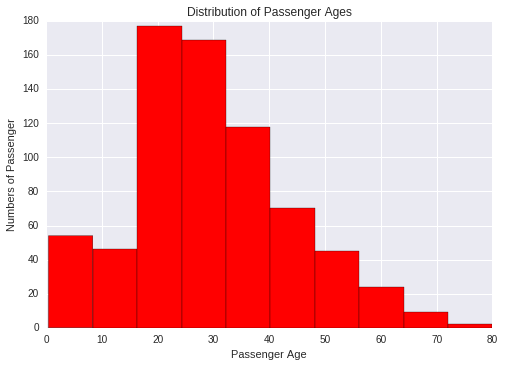

In [16]:
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(df_nan['Age'], color = 'red')
plt.title('Distribution of Passenger Ages')
plt.xlabel('Passenger Age')
plt.ylabel('Numbers of Passenger')
plt.show()

Mostly the age of the passenger in the dataset are in range of 20-60 where the maximum number occured in 30-40. 

### Distribution of passenger ages

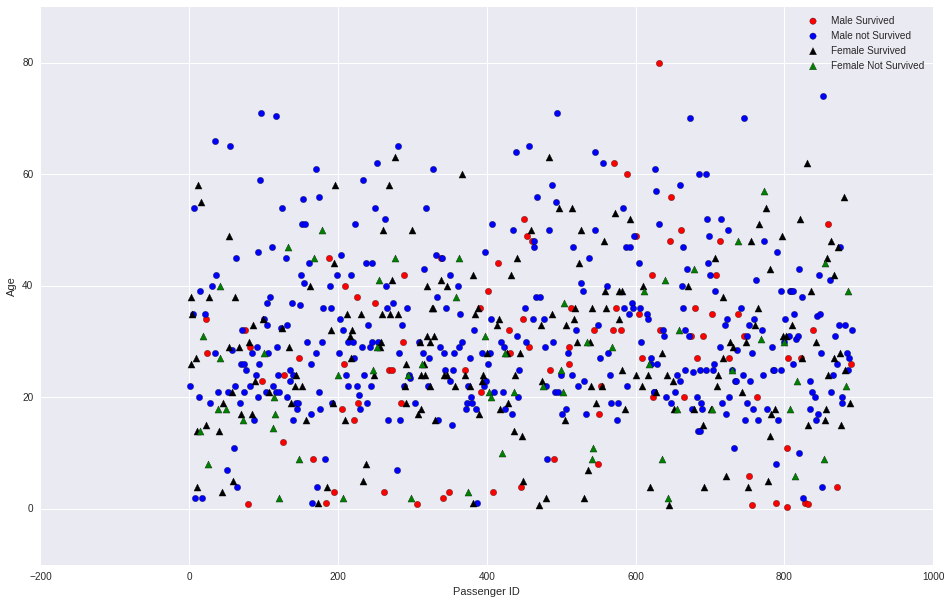

In [17]:
def get_age(sex, survived):
    return df[(df['Sex'] == sex) & (df['Survived'] == survived)]['Age']
def get_id(sex, survived):
    return df[(df['Sex'] == sex) & (df['Survived'] == survived)]['PassengerId']

x1 = get_id('male', 1)
y1 = get_age('male', 1)
x2 = get_id('male', 0)
y2 = get_age('male', 0)
x3 = get_id('female', 1)
y3 = get_age('female', 1)
x4 = get_id('female', 0)
y4 = get_age('female', 0)

fig = plt.figure(figsize=(16, 10))
plot1 = plt.scatter(x1,y1,c='r',s=40)
plot2 = plt.scatter(x2,y2,c='b',s=40)
plot3 = plt.scatter(x3, y3,c ='black',s=50,marker='^')
plot4 = plt.scatter(x4,y4,c='g',s=50,marker='^')

plt.xlabel('Passenger ID')
plt.ylabel('Age')
plt.legend((plot1,plot2,plot3,plot4), ('Male Survived','Male not Survived','Female Survived','Female Not Survived'), 
           loc='best')
plt.show()

From the above scatter, we conclude that the female with age >= 60 are totally survived. We are not seeing any pattern for male. No other pattern is observed from the plot.

### Number of male survivability by class
Number of total male vs male survived in each classes.

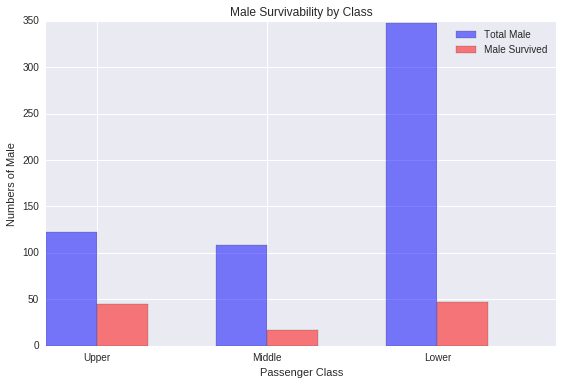

In [18]:
import numpy as np
import matplotlib.pyplot as plt

male = (male_upper, male_middle, male_lower)
male_survived = (male_survived_upper, male_survived_middle, male_survived_lower)

index = np.arange(3)
bar_width = 0.30
opacity = 0.5

bar1 = plt.bar(index, male, bar_width, alpha = opacity, color = 'b', label = 'Total Male')
bar2 = plt,bar(index + bar_width, male_survived, bar_width, alpha = opacity, color = 'r', label = 'Male Survived')

plt.xlabel('Passenger Class')
plt.ylabel('Numbers of Male')
plt.title('Male Survivability by Class')
plt.xticks(index + bar_width, ('Upper', 'Middle', 'Lower'))
plt.legend()

plt.tight_layout()
plt.show()

### Number of female survivability by class
Number of total female vs female survived in each classes.

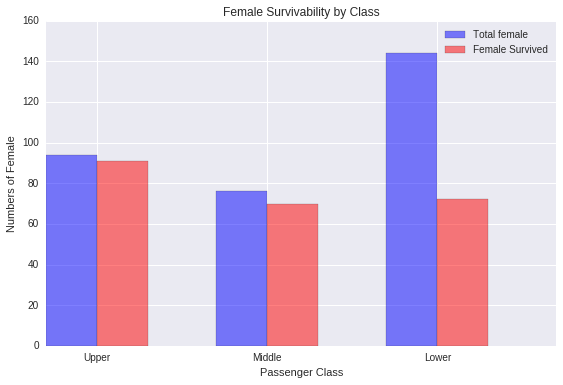

In [19]:
import numpy as np
import matplotlib.pyplot as plt

female = (female_upper, female_middle, female_lower)
female_survived = (female_survived_upper, female_survived_middle, female_survived_lower)

index = np.arange(3)
bar_width = 0.30
opacity = 0.5

bar1 = plt.bar(index, female, bar_width, alpha = opacity, color = 'b', label = 'Total female')
bar2 = plt,bar(index + bar_width, female_survived, bar_width, alpha = opacity, color = 'r', label = 'Female Survived')

plt.xlabel('Passenger Class')
plt.ylabel('Numbers of Female')
plt.title('Female Survivability by Class')
plt.xticks(index + bar_width, ('Upper', 'Middle', 'Lower'))
plt.legend()

plt.tight_layout()
plt.show()

### Servivability rate

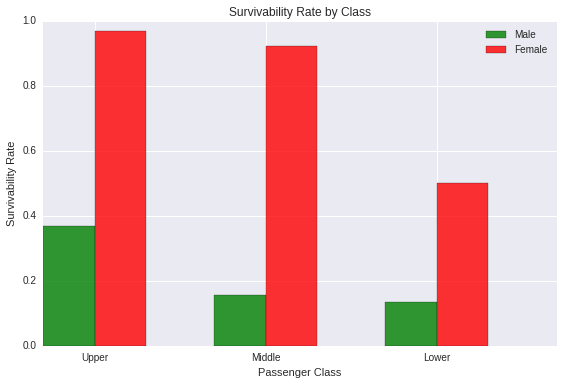

In [20]:
male = (male_survived_upper/float(male_upper), male_survived_middle/float(male_middle), \
              male_survived_lower/float(male_lower))
female = (female_survived_upper/float(female_upper), female_survived_middle/float(female_middle), \
          female_survived_lower/float(female_lower))

index = np.arange(3)
bar_width = 0.30
opacity = 0.8

bar1 = plt.bar(index, male, bar_width, alpha = opacity, color = 'g', label = 'Male')
bar2 = plt,bar(index + bar_width, female, bar_width, alpha = opacity, color = 'r', label = 'Female')

plt.xlabel('Passenger Class')
plt.ylabel('Survivability Rate')
plt.title('Survivability Rate by Class')
plt.xticks(index + bar_width, ('Upper', 'Middle', 'Lower'))
plt.legend()

plt.tight_layout()
plt.show()

From the above plot, We find that the female survivability rate is larger than the male for every classes. Moreover, the survivability rate of female upper class is maximum equal to 0.968.

### Boxplot of servivability

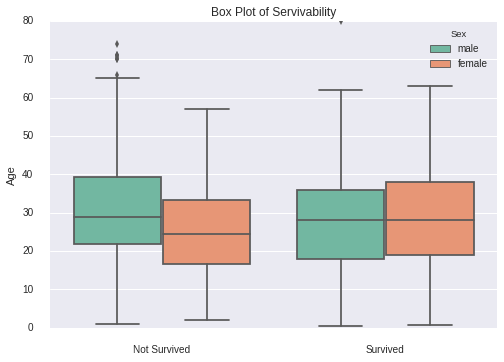

In [21]:
df = pd.read_csv('/home/pk/titanic_data.csv')

fig = plt.figure()
box = sns.boxplot(x = 'Survived', y = 'Age', hue = 'Sex', data = df, order = [0,1], palette="Set2")
sns.despine(offset = 10, trim = True)

labels = ['Not Survived','Survived']
plt.subplots_adjust(top = 0.9)
box.set_ylabel('Age')
box.set_xlabel(' ')
box.set_xticklabels(labels)
sns.plt.title('Box Plot of Servivability')
plt.show()

Above boxplot show that median of both male and female passenger survived are same equal to 28. 

### Boxplot of passenger class

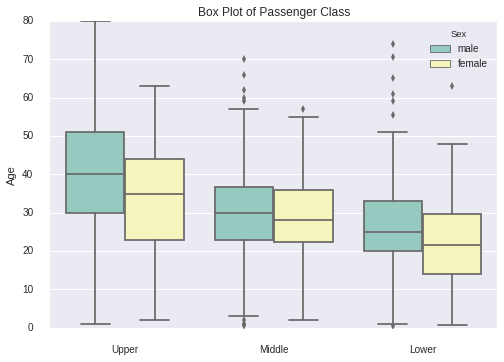

In [22]:
fig = plt.figure()
box = sns.boxplot(x = 'Pclass', y = 'Age', hue = 'Sex', data = df, order = [1,2,3], palette="Set3")
sns.despine(offset = 10, trim = True)

labels = ['Upper','Middle', 'Lower']
plt.subplots_adjust(top = 0.9)
box.set_ylabel('Age')
box.set_xlabel(' ')
box.set_xticklabels(labels)
sns.plt.title('Box Plot of Passenger Class')
plt.show()

Above plot show that the upper class people are generally belong to higher age group with median equal to 40 for male and 35 for female. The lower class people are likely belong to lower age group with median equal to 25 for male and 21.5 for female.

### Boxplot of fare and survivability

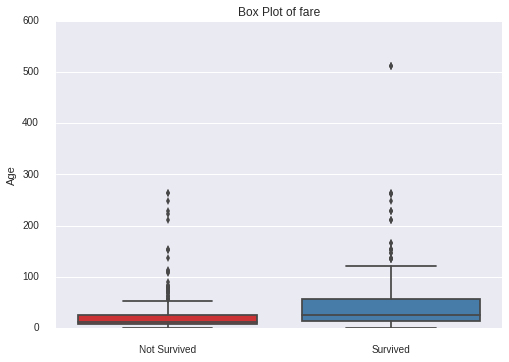

In [23]:
fig = plt.figure()
box = sns.boxplot(x = 'Survived', y = 'Fare', order = [0,1], data = df, palette="Set1")
sns.despine(offset = 10, trim = True)

labels = ['Not Survived','Survived']
plt.subplots_adjust(top = 0.9)
box.set_ylabel('Age')
box.set_xlabel(' ')
box.set_xticklabels(labels)
sns.plt.title('Box Plot of fare')
plt.show()

Above plot show that there are lots of outlier which cause higher standard deviation for both cases.

## Fourth Stage: Conclusion

After analysing the above plots, we can draw following conclusions:
1. The upper class people are more likely to survive compare to the middle and lower class people.
2. Female upper class people have the extreme chance of survival with probability equal to 0.968.
3. Male upper class people have also more chance of survival compare to middle and lower class.
4. The mean and median of both gender survivability are approx. same which is equal to 28.
5. The lower class people are mostly belong to shorter age-group 20-30.
6. The upper class people are mostly belong to higher age-group 35-45.
7. There are many outliers in the fare.
8. Min fare are equal to zero for both survived and unsurvived cases.
9. Max fare are very high for both cases but max survived fare are significantly higher than unsurvived fare.
10. There is correlation in both the fare and passenger class. As, the fare and class increases, chance of the survivability also increase.

Our results can be more accurate if some more extra information available:
1. We know 100% data of the age of the people so that we can draw clear conclusion about the age-group.
2. The members of the particular family is given a "Group ID" so that we can distinguish among lastname and find exact numbers of the people belonging to the particular family.